# Неделя Трансформеров: День 2. Эволюция

Сегодня мы сделаем паузу в математике и посмотрим на эволюцию архитектуры трансформеров. Поймем, как манипуляции с моделью и ее масштабирование привели к появлению гигантских LLM (Large Language Model) с миллиардами параметров, и какие новые методы обучения усовершенствовали работу трансформеров.

А также как относительно быстро выбрать и использовать трансформер. .

Ну и в качестве специального бонуса — разбор самых свежих и даже горячих новостей из мира больших языковых моделей. Своими уникальными инсайтами поделятся ведущие эксперты:
   Иван Валерьевич Оселедец (Сколтех, генеральный директор AIRI),
   Себастьен Бюбек/Sebastien Bubeck (OpenAI, экс-вице-президент Microsoft по прикладным исследованиям).

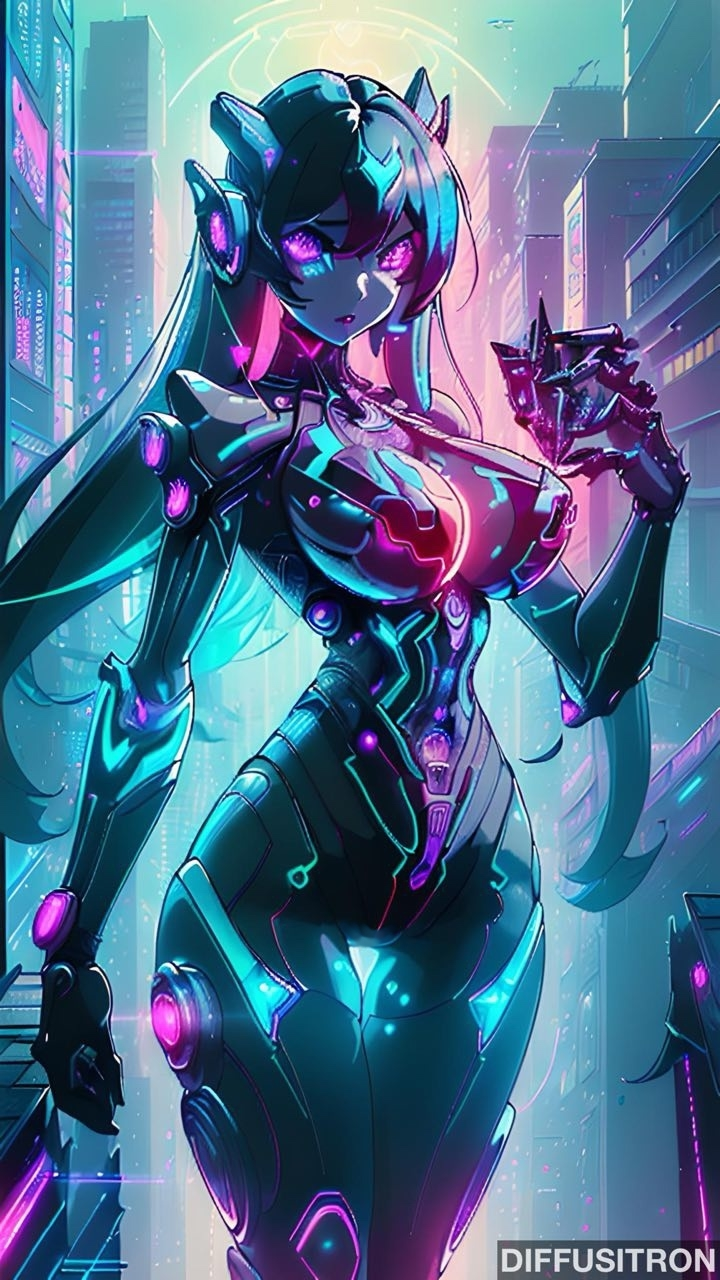

In [2]:
from IPython.display import Image
Image('2_Title_.jpg', width=300, height=150 )

# Содержание
    1. BERT
    2. GPT 
    3. DeepSeek, взаимодействие математики и LLM
    4. LLM Breaking News! 
    5. Заключение

После появления трансформеров, их начали модифицировать под разные задачи, зачастую сильно меняя структуру. Эксперименты породили две эволюционные ветки с более-менее универсальным подходом: оставить от модели только энкодер (BERT) и только декодер (GPT). Начнем с Энкодер-моделей.

Напоминаю, что в рамках данного цикла я не рассказываю подробно, что такое обучение моделей. Будем считать, что это процесс, по входящим данным и фиксированной функции (потерь) модифицирующий параметры (веса) модели, желательно, к лучшему.

# 1. BERT, 2019

## Архитектура

**B**idirectional **E**ncoder **R**epresentations from **T**ransformers.
https://arxiv.org/pdf/1810.04805 2019 (Google). Получил свое имя в честь персонажа улицы Сезам, продолжая тенденцию ELMo (предшествующей модели, использующей LSTM для создания эмбеддингов). Некоторые последователи продолжают называть свои модели в том же духе: RoBERTa, ALBERT.

Итак, первой идеей было удалить весь стек декодеров, увеличив число параментров стека энкодеров. Реализации, описанные в статье, имели размер BERTBASE (L=12, $d_{model}$=768, Total Parameters=110M) и BERTLARGE (L=24, $d_{model}$=1024, Total Parameters=340M), где L - количество  блоков энкодеров. Что значительно больше, чем у исходного трансформера.

Как уже было сказано, получен просто удалением всего правого стека декодеров с целью создать универсальный преобразователь эмбеддингов. То есть один раз хорошо обучить модель, заморозить ее веса, а потом подгонять под задачу, добавляя сверху произвольные слои и дообучая только их, что  значительно ускоряет получение работающей модели для текущей задачи.

Создатели BERT не были первооткрывателями этой идеи, но они довели ее до отличного продукта.  

## Обучение 
Другим ноу-хау в модели BERT было переосмысление процесса обучения. В отличие от традиционных моделей, которые "читали" предложение слева направо, или справа налево, и предсказывали слово за словом, модель, как и ELMo является двунаправленной, т.е. смотрит на текущее слово и слева и справа (на самом деле, получает все предложение целиком). Каждый шаг обучения включает в себя:
1. Masked LM: Во входящем предложении скрываются несколько слов (спецсимволом, либо неправильным словом, либо, чтобы модель не обучилась неправильному, правильным словом), модель обучается эти слова угадывать.
2. Next Sentence Prediction (предсказание порядка двух предложений): Модели передается пара предложений, а она должна определить, действительно ли второе следует за первым или это случайная фраза.

Также отметим колоссальный объем датасета для обучения: предобучение ведётся на текстовых данных корпуса BooksCorpus (800 млн. слов), а также на текстах англоязычной Википедии (2.5 млрд. слов). Качество модели авторы оценивают на популярном для обучения моделей обработки естественного языка наборе задач GLUE.

## Результат
Комбинация такой архитектуры и такого обучения принесла плоды! При своем появлении BERT побил существующие state-of-art модели задач обработки текста на 5-10%.

Повторюсь, суть в том, что дообучать надо только нейросеть-надстройку, так как всю работу по предобучению авторы модели уже проделали. На практике в качестве эмбеддинга можно использовать *любой* слой BERT. Также можно брать более легковесные модели типа DistilBERT, либо наоборот более тяжеловесные.

Ну и небольшие демонстрации дообучения BERT можно посмотреть тут:
1. https://habr.com/ru/articles/498144/  Jay Alammar, перевод by Сергей Шкарин
2. https://m.vkvideo.ru/video-145052891_456245763

## Полезные ссылки: модели и ресурсы

Откуда брать модели:
Huggingface https://huggingface.co/ , 
огромная коллекция предобученных моделей и датасетов.

Для их использования нужны вычислительные ресурсы. Немного бесплатно (или много платно) погонять модели можно в сервисах 
Google Colab https://colab.research.google.com/
Kaggle https://www.kaggle.com/
Yandex Cloud https://yandex.cloud/


In [1]:
# пример загрузки данных и модели на Google Colab
from datasets import load_dataset

ds = load_dataset("JeswinMS4/code_text_classification")

In [ ]:
pip install bitsandbytes -q

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen2.5-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    trust_remote_code=True # позволяет избежать некоторых ошибок
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto", # размещает модель в памяти  
                       # видеокарты (cuda), если это возможно
    load_in_4bit=True, # загружает облегченную модель 
                       # с пониженной точностью
    trust_remote_code=True # позволяет избежать некоторых ошибок
)

# 2. GPT, 2018

Илон Маск и Сэм Альтман (президент венчурного фонда Y Combinator) запустили OpenAI в конце 2015 с целью создать открытую компанию, работающую на благо общества, а не государства или корпорации. 

И через несколько лет Open AI выпустила инновационное решение, изменившее жизни миллионов людей!

В 2018 году выходит статья Improving Language Understanding by Generative Pre-Training
https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf
В ней было решено полностью отказаться от энкодера (в том числе от блока внутри декодера, к которому поступает информация от энкодера).

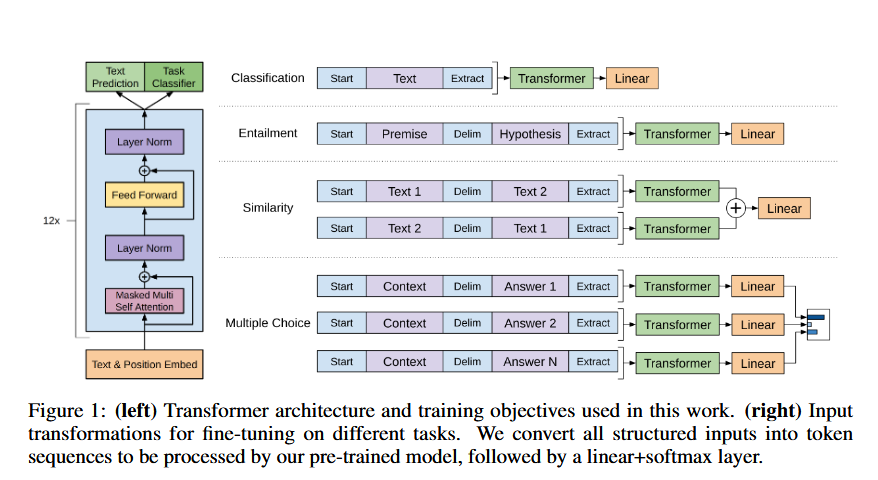

In [14]:
from IPython.display import Image
Image('3_fig_1.png', width=450, height=150 )

Рисунок из оригинальной статьи

В модели GPT так же, как в BERT, происходит предобучение основной модели и дообучение надстройки, но само обучение устроено несколько по-другому. GPT предсказывает следующее слово (поэтому историю его разработки часто начинают рассказывать с T9). 

Процесс работы с GPT выглядит так: мы подаем на вход модели текст (с запросом), а она дописывает свое продолжение. Если это продолжение (генерация) совпадает с нашими ожиданиями — модель решила поставленную задачу. Тот текст, что мы подаем на вход, называется **prompt**. Чем точнее он описывает, что мы хотим, тем лучше модель поймет, что ей нужно делать. В промпт также можно загрузить парочку примеров.

Обучение GPT также состояло из двух этапов: 1) Unsupervised pre-training, когда модели давали множество (7000 книг) текстов, чтобы она училась предсказывать следующее слово и 2) Supervised fine-tuning, когда модель дообучали на конкретных задачах (например, классификации текстов, как на рисунке выше). В сумме у модели было 117 миллионов параметров (https://neuro-ai.ru/model/gpt-1.html). 

Однако, ее господство быо недолгим: вышел BERT и побил рекорды. В OpenAI подумали, и в 2019 решили масштабировать GPT до 1.5 миллиарда параметров, незначительно меняя архитектуру (https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf). Обучающая выборка составила 8 миллионов документов, всего 40 GB текста. GPT-2 от всего этого настолько вдохновилась, что научилась писать длинные связные тексты и решать с помощью промптов множество новых задач.

В 2020 году число параметров модели увеличили примерно в 100 раз, до 175B параметров, объем обучающей выборки также увеличился. Это привело к тому, что GPT-3 научилась кодить. Тут уже стал очевиден следующий эффект: при увеличении размера модели сначала как будто бы не меняется ничего, а затем происходит качественный скачок, и модель начинает «понимать», как решать ту или иную задачу. Как и почему это работает — никто точно не знает.

Решение улучшалось и масштабировалось, в том числе в рамках борьбы с токсичностью  в 2022 году изобрели Instruct-модель GPT-3.5, сбалансированную между токсичностью и четкостью. Затем GPT-3.5 дообучили на диалогах и выкатили тот самый ChatGPT, который мгновенно стал хитом. Пророчили, что он скоро оставит человеков совсем без работы, но пока что цифровая революция не достигла этой точки сингулярности.  

GPT породил много последователей, таких как LLAMA, QWEN, GEMINI и многие другие. Каждую такую модель можено использовать для специфических задач (например, последние модели QWEN считается достаточно хорошими "программистами", но вот LLAMA, с которой ее списывали, в последнее время сдает позиции).

Пример работы с кодом GPT-модели "sberbank-ai/rugpt3large_based_on_gpt2" можно посмотреть тут 
https://habr.com/ru/articles/599673/
https://colab.research.google.com/drive/1sD_hQJOi3CrHn7Ba-XuKkHRToxDRRSof?usp=sharing#scrollTo=D5Eezvzm_hrI

# 3. DeepSeek, взаимодействие математики и LLM

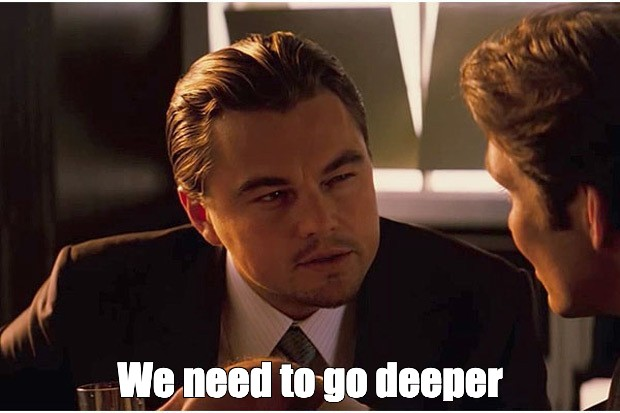

In [15]:
Image('2_mem_2.jpg', width=300, height=150 )

Весной 2025 был большой хайп, связанный с выходом в открытый доступ новой LLM-модели DeepSeek из Китая. Этот геополитический фактор накладывает свои особенности на презентацию модели и коммуникацию с ее авторами. Описание модели в виде отчетов о разработке можно почитать здесь https://arxiv.org/pdf/2501.12948 и здесь https://arxiv.org/pdf/2412.19437
Архитектура представляет собой трансформер с проапгрейженными Attention и Feed-Forward. Обучение проводится аналогично GPT, также с прокачанными функциями. Но главной фишкой опять-таки является сбор данных для обучения и их предобработка.

Небольшой сравнительный анализ GPT и DeepSeek (с 25:30) можно посмотреть здесь
https://vkvideo.ru/video-145052891_456248150

А также в сеть выложен целый доклад об особенностях DeepSeek:

26 марта 2025 Иван Валерьевич Оселедец (Сколтех, генеральный директор AIRI) выступил с кратким обзором модели 
https://m.mathnet.ru/php/seminars.phtml?option_lang=rus&presentid=45696
и наблюдениями о взаимном внимании математики и LLM.

В первой части доклада были рассказаны основные принципы, которые использовались при разработке. Выводы начинаются примерно с 37:17. Помимо различных инженерных ноу-хау, были обозначены следующие моменты:

Во-первых разработчики DeepSeek обнаружили, что при обучении на математических текстах и коде LLM сильно прибавляет в логике рассуждений, поэтому в обучающую выборку добавилось много верифицированных математических рассуждений с arxiv и кода с Github. И вообще над выборкой было проделано много работы.

Во-вторых разработчики исходили из принципа, что модель должна рассуждать и обучали ее исходя из этой парадигмы. При работе с мобильной версией, которую можно бесплатно скачать с AppStore, можно наблюдать, как модель "думает", а также включить режим более углубленного обдумывания. Другие модели также начали подхватывать эту фичу.

Под конец выступления Иван Валерьевич поделился лайфхаком: когда выходит новая хайповая LLM, он предлагает ей написать доказательство т.н. Moscow-Problem (Тыртышников, Замарашкин, Горейнов).

Но, по моему опыту, пока что LLM начинают впадать в ступор уже на задаче по теории вероятностей: 

Используя сбалансированную монетку, мы можем сделать равновероятный выбор из двух альтернатив. Можем ли мы с помощью этой монетки сделать выбор из трех альтернатив? 

# 4. LLM Breaking News!

**Срочная новость: 20.08.2025** Sebastien Bubeck (OpenAI,  Former Microsoft's Vice President of Applied Research) взял статью по выпуклой оптимизации (https://arxiv.org/abs/2503.10138v1), где некоторое утвеждение  было верно левее промежутка  [1/L, 1.75/L] и неверно правее этого промежутка в версии от 13.03.2025 (в дальнейшем к работе над статьей присоединился еще один соавтор и в финальном переработанном варианте была доказана точность оценки 1.75/L).

Sebastien Bubeck загрузил в GPT 5 первую версию статьи и попросил модель улучшить доказательство, затем лично проверил результат. GPT 5, усиливая оригинальный подход, и не прибегая к переработанному подходу, поднял нижнюю оценку вплоть до 1.5/L. При повторнах запусках модель поднимала планку еще выше.

К сожалению, точная формулировка результата пока доступна только в X (Twitter) и LinkedIN. Если это правда, то ИИ вплотную подбирается к тому, чтобы на автоматизированном уровне дорабатывать придуманные математиками идеи. 

Хотя не исключено, что это просто рекламный ход OpenAI.

# Заключение
На этом очень краткий исторический обзор истории трансформеров окончен.
Остаток недели я хотел бы посвятить обзору интересных идей из свежих статей.

# Ссылки

## BERT

Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova
(Google AI Language), 
BERT: Pre-training of Deep Bidirectional Transformers for
Language Understanding
https://arxiv.org/pdf/1810.04805

М. Тихонова (Сбер, ВШЭ, Otus), Модель BERT - классика современного NLP // Занятие курса «Natural Language Processing (NLP)»
https://m.vkvideo.ru/video-145052891_456245763

Jay Alammar, перевод Сергея Шкарина, Ваш первый BERT
https://habr.com/ru/articles/498144/  

#### Дополнительно

Rani Horev, BERT в двух словах: Инновационная языковая модель для NLP
https://habr.com/ru/companies/otus/articles/702838/

Модели BERT для машинного обучения: гайд для начинающих
https://habr.com/ru/companies/skillfactory/articles/862130/



## GPT

Alec Radford, Karthik Narasimhan, Tim Salimans, Ilya Sutskever (OpenAI),
Improving Language Understanding by Generative Pre-Training
https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf

Anton Razzhigaev(https://t.me/abstractDL), GPT для чайников: от токенизации до файнтюнинга
https://habr.com/ru/articles/599673/
https://colab.research.google.com/drive/1sD_hQJOi3CrHn7Ba-XuKkHRToxDRRSof?usp=sharing#scrollTo=D5Eezvzm_hrI

## DeepSeek

DeepSeek-AI: 
1. DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via
Reinforcement Learning 
https://arxiv.org/pdf/2501.12948
2. DeepSeek-V3 Technical Report
https://arxiv.org/pdf/2412.19437

М. Тихонова (Сбер, ВШЭ, Otus), ChatGPT VS DeepSeek: что под капотом у самых продвинутых LLM? // Демо-занятие курса «NLP. Advanced»
https://vkvideo.ru/video-145052891_456248150

И. В. Оселедец, DeepSeek и подходы, реализованные в нем
https://m.mathnet.ru/php/seminars.phtml?option_lang=rus&presentid=45696